# Data Loading and Basic Exploration


In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from datasist.structdata import detect_outliers
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Retail Sales\Sourse\Retail_Sales_Data.csv")

In [24]:
print(df.shape)
df.head(10)

(30600, 11)


,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81.0,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0.0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0.0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0.0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0.0,Swaziland,Furniture,Wednesday,False
5,Spearsland,52372247,2022-01-06,8,3046.32,0,41.0,Bhutan,Furniture,Thursday,False
6,Spearsland,52372247,2022-01-07,6,2284.74,0,0.0,Suriname,Furniture,Friday,False
7,Spearsland,52372247,2022-01-08,9,3427.11,0,83.0,Taiwan,Furniture,Saturday,False
8,Spearsland,52372247,2022-01-09,7,2665.53,0,0.0,Papua New Guinea,Furniture,Sunday,False
9,Spearsland,52372247,2022-01-10,1,380.79,0,164.0,Canada,Furniture,Monday,False


In [25]:
# Get information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30600 entries, 0 to 30599
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30600 non-null  object 
 1   Product ID             30600 non-null  int64  
 2   Date                   30600 non-null  object 
 3   Units Sold             30600 non-null  int64  
 4   Sales Revenue (USD)    29700 non-null  float64
 5   Discount Percentage    30600 non-null  int64  
 6   Marketing Spend (USD)  29700 non-null  float64
 7   Store Location         29700 non-null  object 
 8   Product Category       30600 non-null  object 
 9   Day of the Week        30600 non-null  object 
 10  Holiday Effect         30600 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 2.4+ MB


In [26]:
# Describe the dataset 
df.describe()

,Product ID,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD)
count,3.060000e+04,30600.000000,29700.000000,30600.000000,29700.000000
mean,4.462919e+07,6.157745,2750.834422,2.973856,49.952929
std,2.780184e+07,3.321078,2571.866250,5.974250,64.386076
min,3.636541e+06,0.000000,0.000000,0.000000,0.000000
25%,2.228600e+07,4.000000,882.450000,0.000000,0.000000
50%,4.002449e+07,6.000000,1900.435000,0.000000,1.000000
75%,6.559352e+07,8.000000,3863.920000,0.000000,100.000000
max,9.628253e+07,56.000000,27165.880000,20.000000,199.000000


# Understanding Data Distributions

In [27]:
# Get number of unique values in each column and their unique values 
for col in df.columns:
    print('Column Name: ',col)
    print(df[col].nunique())
    print('-'*30)
    print(df[col].unique())
    print('='*30)

Column Name:  Store ID
1
------------------------------
['Spearsland']
Column Name:  Product ID
42
------------------------------
[52372247  3636541 14258596 34875230 73978756 34892534  9529489 16840607
 60070623 36491025 80767985 30776388 65656938  8978790 64503400 65593523
 44234706  9189980 38511400  8914811 29925957 22286000 90008474 62375351
  6741754 86469371 89528563 93691949 40024486 56655933 56183269 47856080
 81218219 24102292  8628619 71215150 96282526 22571670 18794205 47345331
 22928719 50239115]
Column Name:  Date
731
------------------------------
['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-23' '2022-01-24' '2022-01-25'
 '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-29' '2022-01-30'
 '2022-01-31' '2022-02-01' '2022-02

In [28]:
# Check for missing values in each column
df.isna().sum()

Store ID                   0
Product ID                 0
Date                       0
Units Sold                 0
Sales Revenue (USD)      900
Discount Percentage        0
Marketing Spend (USD)    900
Store Location           900
Product Category           0
Day of the Week            0
Holiday Effect             0
dtype: int64

In [29]:
# Check for duplicates
df.duplicated().sum()

600

In [30]:
# Drop duplicates and reset the index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

0

In [31]:
# Drop missing value in target column
df.dropna(subset=['Sales Revenue (USD)'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [32]:
df.isna().sum()

Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

# Feature Engineering

In [33]:
# Convert 'Product ID' from int to object, and 'Date' from object to datetime
df['Product ID'] = df['Product ID'].astype('object')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [34]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extracting new features: Year, Month, Day of the Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day of the Week'] = df['Date'].dt.day_name()

# Checking if specific categories or locations impact sales
category_sales = df.groupby('Product Category')['Sales Revenue (USD)'].sum().sort_values(ascending=False)
location_sales = df.groupby('Store Location')['Sales Revenue (USD)'].sum().sort_values(ascending=False)

category_sales, location_sales


(Product Category
 Electronics    28983393.47
 Furniture      22610798.40
 Clothing       19678356.28
 Groceries      10031124.69
 Name: Sales Revenue (USD), dtype: float64,
 Store Location
 Congo                          638264.54
 Korea                          580296.88
 Turkey                         447713.68
 Kenya                          444717.91
 Anguilla                       443530.28
                                  ...    
 Gabon                          244792.00
 Northern Mariana Islands       227983.01
 United States of America       217874.36
 French Southern Territories    211321.84
 Andorra                        198161.32
 Name: Sales Revenue (USD), Length: 243, dtype: float64)

# Outlier Detection

In [35]:
# Identifying outliers in 'Sales Revenue' and 'Marketing Spend' using IQR (Interquartile Range)
Q1 = df[['Sales Revenue (USD)', 'Marketing Spend (USD)']].quantile(0.25)
Q3 = df[['Sales Revenue (USD)', 'Marketing Spend (USD)']].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
outliers = df[((df[['Sales Revenue (USD)', 'Marketing Spend (USD)']] < (Q1 - 1.5 * IQR)) |
               (df[['Sales Revenue (USD)', 'Marketing Spend (USD)']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Displaying the outliers
outliers

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect,Year,Month
354,Spearsland,52372247,2022-12-25,22,8377.38,0,84.0,Japan,Furniture,Sunday,True,2022,12
729,Spearsland,3636541,2022-01-08,10,9512.10,0,0.0,Mauritania,Furniture,Saturday,False,2022,1
736,Spearsland,3636541,2022-01-15,9,8560.89,0,0.0,Hong Kong,Furniture,Saturday,False,2022,1
750,Spearsland,3636541,2022-01-30,14,11985.25,10,0.0,Costa Rica,Furniture,Sunday,False,2022,1
753,Spearsland,3636541,2022-02-02,11,10463.31,0,0.0,Malaysia,Furniture,Wednesday,False,2022,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28431,Spearsland,47345331,2022-12-17,19,8469.25,0,0.0,Pitcairn Islands,Electronics,Saturday,False,2022,12
28728,Spearsland,47345331,2023-10-14,19,8469.25,0,21.0,Martinique,Electronics,Saturday,False,2023,10
28733,Spearsland,47345331,2023-10-21,19,8469.25,0,0.0,Portugal,Electronics,Saturday,False,2023,10
28782,Spearsland,47345331,2023-12-09,34,15155.50,0,0.0,Korea,Electronics,Saturday,False,2023,12


In [36]:
# check if there are outliers in the numerical columns
cols = df.select_dtypes(include=['int', 'float'])
for col in cols:
    fig = px.box(df, x=col)
    fig.show()

In [37]:
# Detecting and removing outliers using module detect_outliers from datasist.structdata library 
cols = ['Units Sold', 'Sales Revenue (USD)']
outliers_index = detect_outliers(df, 0, cols)
print(len(outliers_index))
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

1599


In [38]:
# Show shape after removing outliers and cleaning the data
df.shape

(27951, 13)

# Correlations Between Variables

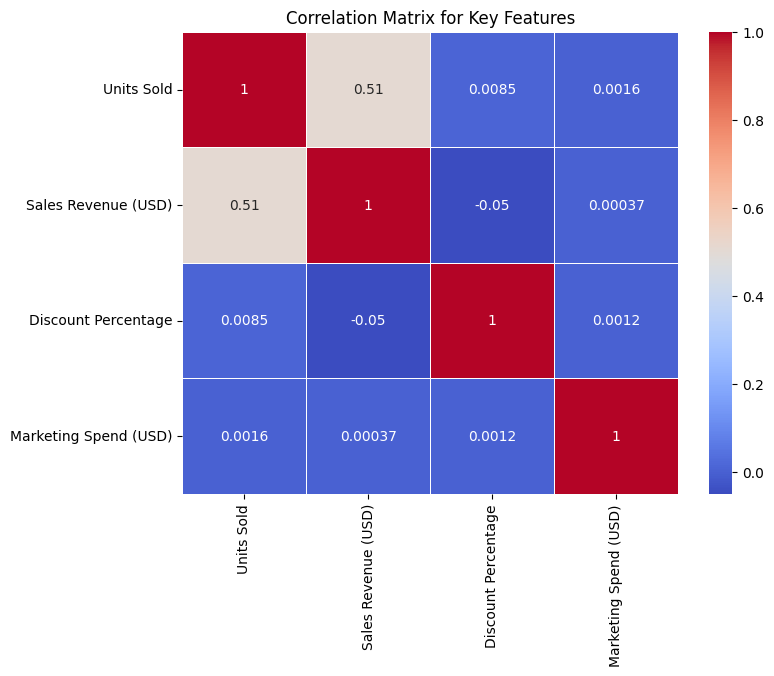

In [39]:
# Correlation matrix to understand relationships between key variables
correlation_matrix = df[['Units Sold', 'Sales Revenue (USD)', 'Discount Percentage', 'Marketing Spend (USD)']].corr()

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Key Features')
plt.show()

### Exploratory Data Analysis (EDA)

In this section, we perform a thorough EDA to understand the key features of the retail sales data.

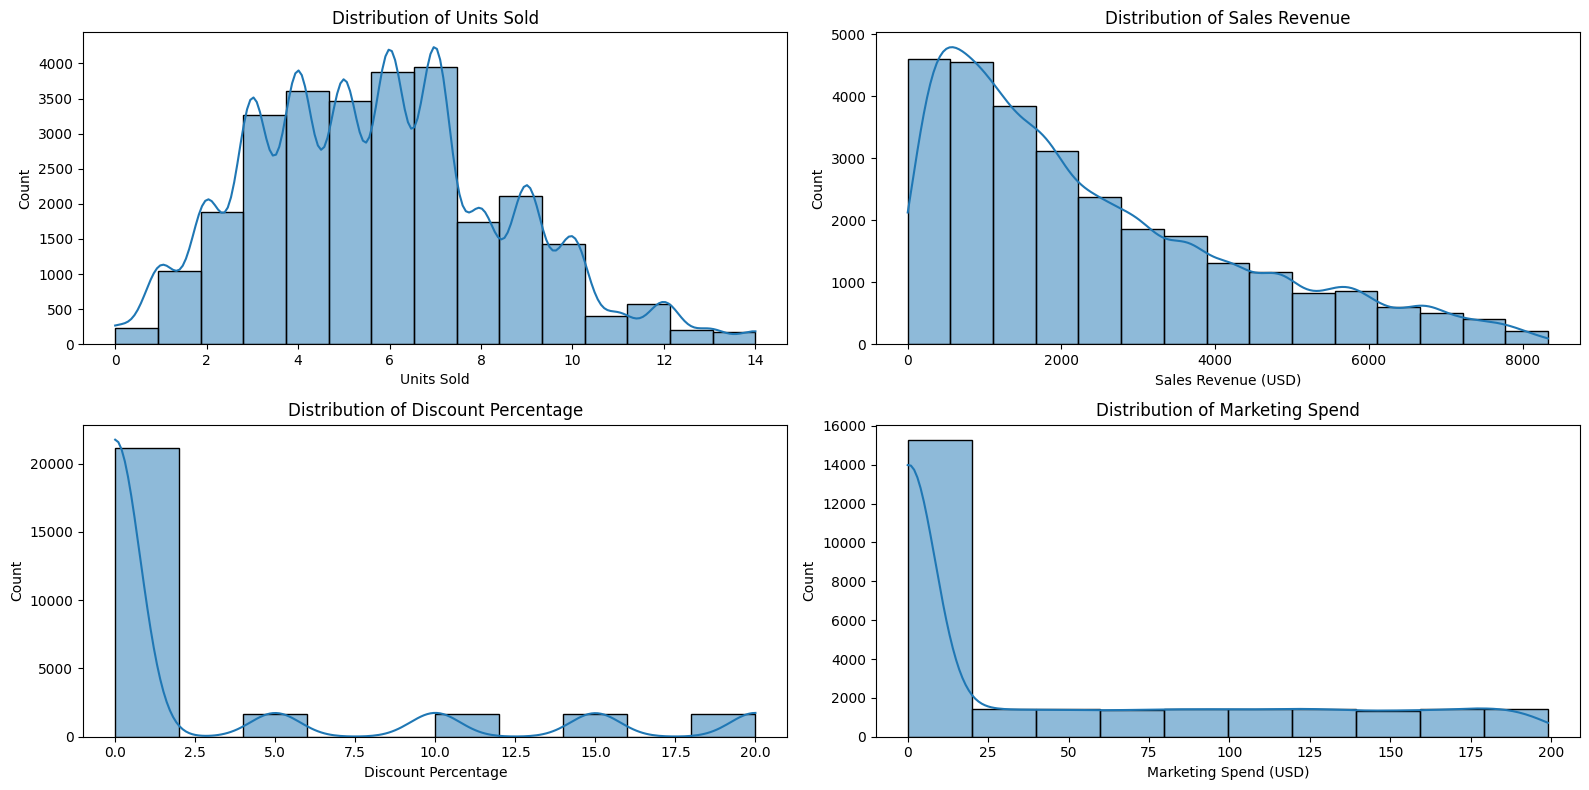

In [40]:
# Setting up figure aesthetics for distribution plots
plt.figure(figsize=(16, 8))

# 1. Distribution of Units Sold
plt.subplot(2, 2, 1)
sns.histplot(df['Units Sold'], bins=15, kde=True)
plt.title('Distribution of Units Sold')

# 2. Distribution of Sales Revenue
plt.subplot(2, 2, 2)
sns.histplot(df['Sales Revenue (USD)'], bins=15, kde=True)
plt.title('Distribution of Sales Revenue')

# 3. Distribution of Discount Percentage
plt.subplot(2, 2, 3)
sns.histplot(df['Discount Percentage'], bins=10, kde=True)
plt.title('Distribution of Discount Percentage')

# 4. Distribution of Marketing Spend
plt.subplot(2, 2, 4)
sns.histplot(df['Marketing Spend (USD)'], bins=10, kde=True)
plt.title('Distribution of Marketing Spend')

plt.tight_layout()
plt.show()


### Sales Trends and Marketing Impact Visualizations

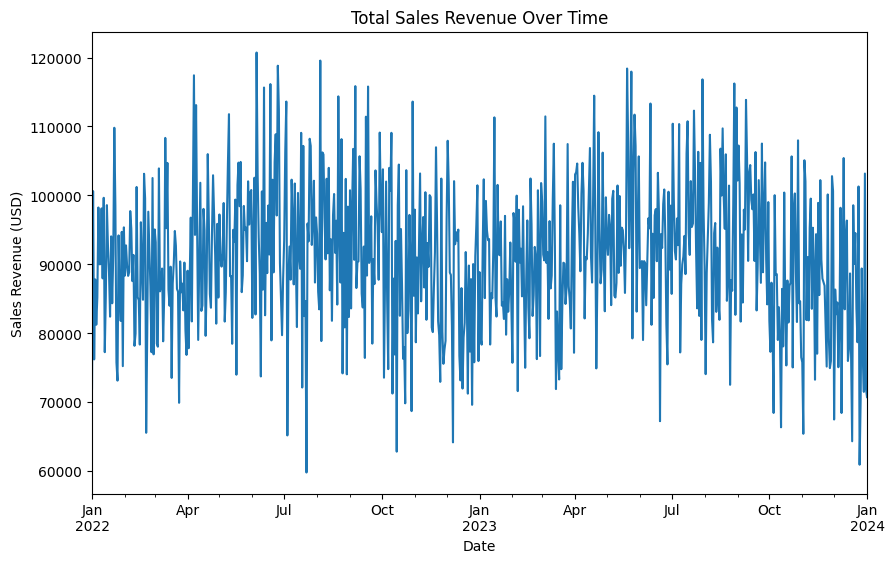

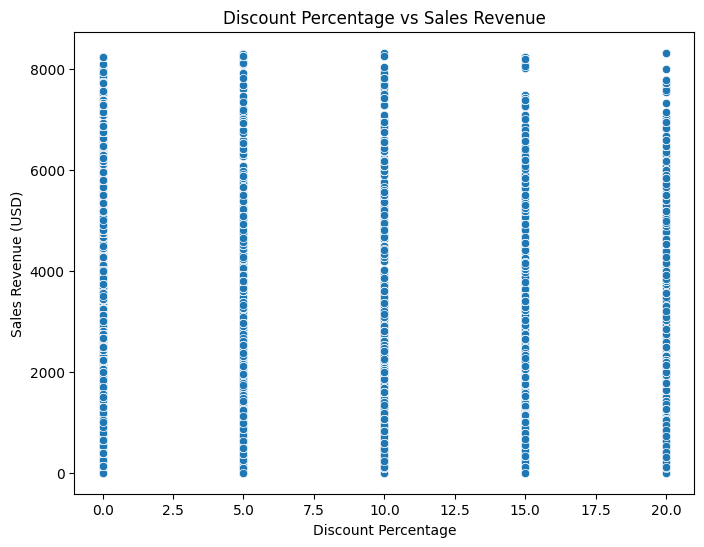

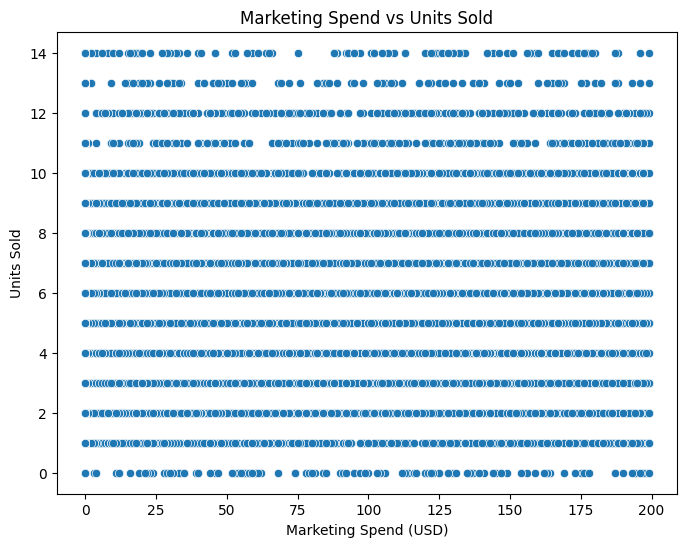

In [41]:

# Visualizing sales trends over time
plt.figure(figsize=(10,6))
df.groupby('Date')['Sales Revenue (USD)'].sum().plot()
plt.title('Total Sales Revenue Over Time')
plt.ylabel('Sales Revenue (USD)')
plt.xlabel('Date')
plt.show()

# Scatter plot: Discount Percentage vs Sales Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount Percentage', y='Sales Revenue (USD)', data=df)
plt.title('Discount Percentage vs Sales Revenue')
plt.show()

# Scatter plot: Marketing Spend vs Units Sold
plt.figure(figsize=(8,6))
sns.scatterplot(x='Marketing Spend (USD)', y='Units Sold', data=df)
plt.title('Marketing Spend vs Units Sold')
plt.show()


In [42]:
# # save data in csv file
# cleaned_data = df.to_csv('cleaned_data.csv', index=False)